In [29]:
# 聚类
# 多个高斯分布，使用最大似然对每个高斯分布分别求参数

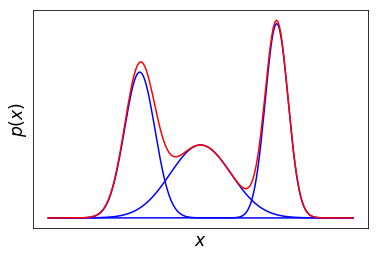

In [30]:
# 混合高斯模型

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

xx = np.linspace(-20,20,200)

y1= norm.pdf(xx,loc=0,scale=4)
y2= norm.pdf(xx,loc=10,scale=1.5)
y3= norm.pdf(xx,loc=-8,scale=2)

fig,ax = plt.subplots()

ax.plot(xx,y1,'b')
ax.plot(xx,y2,'b')
ax.plot(xx,y3,'b')

ax.plot(xx,y1+y2+y3,'r')

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel("$x$",fontsize='xx-large')
ax.set_ylabel("$p(x)$",fontsize="xx-large")

plt.show()

简单化

* 一元

$$\widehat{μ} = \frac{1}{n}\sum_{i=1}^nx_i = \bar{x}, \hspace{0.5cm} \widehat{\sigma^2} = \frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})^2$$

* 多元

$$\widehat{\mathbf{μ}} = \frac{1}{N}\sum_{n=1}^N\mathbf{x_n}, \hspace{0.5cm} \widehat{\mathbf{Σ}} = \frac{1}{N}\sum_{n=1}^N(\mathbf{x_n-\widehat{\mathbf{μ}}})(\mathbf{x_n-\widehat{\mathbf{μ}}})^\mathsf{T}$$

In [ ]:
# 说明：
# 一元高斯：特征只有一个维度，i=1,...,n表示的是n个样本数据，服从一个高斯分布，二维平面中可视
# 一元高斯的均值μ为所有样本数和的均值，方差σ^2为每个样本与均值的偏离程度的平方和的均值
# 多元高斯：特征可能有d维，n=1,...,N表示的是N个样本数据，仍然是一个高斯分布，只是不在属于二维平面，位于超平面中
# 多元高斯的均值μ仍然是所有样本数和的均值，方差Σ还是每个样本与均值的偏离程度与自身的点乘和的均值，只不过是在高维超平面中
# 混合高斯：表示有多个多元高斯，每个多元高斯的特征有d维，整个高斯的样本数据有n=1,...,N个，也是再超平面中的多个高斯分布的加权叠加
# 混合高斯的均值μk和方差Σk则有些不同，因每个高斯混合组成了整个高斯，固然每个高斯在整个高斯中都有一个权重，这个权重在概率里可以理解为后验概率，
# 从统计的角度也可以理解为属于这个高斯对x数据的“责任”，或者说是每个高斯对数据x的贡献度，所以混合高斯的对应的每个高斯的均值为所有数据中属于
# 该高斯的数量和Σγ(znk)xn的均值1/NkΣγ(znk)xn，方差Σk也是所有数据中属于该高斯的样本数据与均值的偏离程度与自身的点乘和的均值1/NkΣγ(znk)(xn-μk)(xn-μk)^T
# 而先验概率πk在每次迭代的过程中也会不一样，为属于该高斯的样本数据与总样本数之比，在E步计算之后，Nk会发生变化，也就是属于每个高斯有效样本点的数量，而
# πk=Nk/N，如何决定每个样本点应该数据哪个高斯的呢？是通过后验概率γ(znk)来判断的，我们从γ(znk)的贝叶斯公式，利用初始值(πk,μk,Σk)，就可以求得其后验概率
# 计算出的πk=Nk/N，其实也是符合使用最大似然计算出的先验概率，符合频率等似概率的情况
# γ(znk)，通过比较属于哪个高斯的概率最大，自然也就是判定应属于这个高斯了。我们再看下Nk=ΣNγ(znk)公式，它属于每个样本的加权平均，也就是E[znk]的期望

$$μ_1 = \frac{\sum_{{\color{blue}{\text{blue}}}\hspace{0.1cm}i}x_i}{\text{# of}\hspace{0.1cm}{\color{blue}{\text{blue}}}\hspace{0.1cm}\text{points}}, \hspace{0.5cm} \sigma_1^2 = \frac{\sum_{{\color{blue}{\text{blue}}}\hspace{0.1cm}i}(x_i-μ_1)^2}{\text{# of}\hspace{0.1cm}{\color{blue}{\text{blue}}}\hspace{0.1cm}\text{points}}$$

In [ ]:
# 说明：
# 从上式中也可以看出，在所有样本数据中，通过属于某个高斯的权重来找到属于这个高斯，继而求得每个高斯的均值和方差
# 也就是如果我们事先就知道了每个样本应该属于哪个高斯，求每个高斯的均值和方差自然就变得很简单，虽然公式中是从所有样本点中取找属于哪个高斯
# 但是属于某个高斯的就那么多固定的数量，不是所有的样本数据，注意不要搞混了。另外，就是因为不知道每个数据应该属于哪个高斯，这里就是通过这个
# γ(znk)来判断的

In [31]:
# GMM模型
# 混合高斯属于多项分布和多元高斯分布的混合模型

多项分布

* K维向量$\mathbf{x}$，其中一个元素$x_k = 1$，其余剩余元素等于0，且有$\sum_{k=1}^Kx_k = 1$。

* $x_k = 1$的概率是参数$μ_k$，$\mathbf{x}$的分布是
    $$p(\mathbf{x|μ}) = \prod_{k=1}^Kμ_k^{x_k}$$
    其中$\mathbf{μ} = \left(μ_1,\dots,μ_k\right)^T$，且有$μ_k \ge 0$和$\sum_kμ_k = 1$
    
* 考虑数据集$\mathcal{D}$中$N$个独立的观测$\mathbf{x_1},\dots,\mathbf{x_N}$，似然函数有
    $$p(\mathcal{D}|\mathbf{μ}) = \prod_{n=1}^N\prod_{k=1}^Kμ_k^{x_{nk}} = \prod_{k=1}^Kμ_k^{(\sum_nx_{nk})} = \prod_{k=1}^Kμ_k^{m_k}$$
    其中$m_k = \sum_nx_{nk}$，可得
    $$μ_k^{ML} = \frac{m_k}{N}$$

In [ ]:
# 说明：
# K维向量x：表示的是每个样本数据xn属于哪个分布k，使用的是0 of k方法，就是说把某个数据xn用0,1标记的方法，在某个分布下标记为1的，这个数据
# 就属与这个分布，总共有k个这样的元素，由此我们可以计算出每个元素xn的属于某个分布的概率∏k=1Kμxkk
# K维中有一个元素xk=1，当j≠k时，xj=0
# k个元素只是抽象出来的概念，用于区别每个元素属于哪个分布的概率
# 通过这种方式我们可以表达后面混合高斯中每个元素属于哪个高斯的概率，也就是可以表示成高斯分布中的先验概率πk
# N个独立观测数据x1,...,xN：自然可以得到N个独立观测数据属于某个分布的概率的表达
# 而最大似然，其实也就是在估计取得这一组数据最大可能的模型参数，其似然函数也就是属于某个分布的概率，也就是概率分布或概率密度函数
# 我们要知道似然函数其实描述的是样本点的概率密度分布，每种分布都是不同的似然函数，如0-1，二项，多项，正太，beta分布等
# 显示生活中的很多数据都是服从上述分布，所以我们需要研究它，这些分布都能表现出很好的性质，能够为我们做预测提供帮助
# ∑nxnk：表示的是N个独立观测数据中属于各自分布k的数据数量

In [32]:
# 说明：为什么说其中一个元素x^k=1，其余元素都是0，就是多项分布呢？
# 解释：为1的x_k元素在每个独立样本的分布情况是不同的，每次试验只有zk=1这个元素现象
# 换种说法，如果说zk为1的概率为μk，那为其它的元素的概率就是不同的μk以此也就是区分出了多项
# m^k的意思是每个x^k元素在N个独立观测x1,...,xN中的个数
# 同样使用最大似然函数求得均值
# 多项分布也是0-1分布的自然推广

GMM

* 混合高斯
    $$p(\mathbf{x}) = \sum_{k=1}^K\pi_k\mathcal{N}(\mathbf{x}\mid\mathbf{μ_k,Σ_k})$$
    其中$\sum_{k=1}^K\pi_k = 1$
    
    
* 最大似然
    $$p(\mathbf{X}\mid\mathbf{μ,Σ,\pi}) = \prod_{n=1}^N \ln \left\{{\sum_{k=1}^K\pi_k\mathcal{N}(\mathbf{x_n}\mid\mathbf{μ_k,Σ_k})}\right\}$$
    
* 对数似然
    $$\ln p(\mathbf{X}\mid\mathbf{μ,Σ,\pi}) = \sum_{n=1}^N \ln \left\{{\sum_{k=1}^K\pi_k\mathcal{N}(\mathbf{x_n}\mid\mathbf{μ_k,Σ_k})}\right\}$$
    
    
* 潜变量$K$维向量$\mathbf{z}$，其中一个元素$z_k = 1$，其余剩余元素等于0，且有$\sum_{k=1}^Kz_k = 1$。同时有$p(z_k = 1) = \pi_k$，即
    $$p(\mathbf{z}) = \prod_{k=1}^K\pi_k^{z_k}$$
    
       

In [ ]:
# 说明：
# 混合高斯的概率密度：某个元素属于某个高斯的概率密度，其中πk是某属于个高斯的概率，类似多项分布中的概率μk
# N个独立观测数据的似然函数：表示的是各自高斯中对应的数据的概率密度分布
# 对数似然：利用对数似然很大程度上是为了方便求导，简化计算
# 混合高斯中独立观测数据都只有数据本身的信息，并不知道哪个数据应该属于哪个高斯分布，以此来引入潜变量z，其实呢，对于每个数据它本身应该属于哪个
# 高斯是知道的，只是没有显现出来
# 属于哪个高斯，这就类似一个多项分布，同样可以使用0 of k方法，对数据进行0-1标记来区分出属于哪个高斯的概率，它的概率也就是πk

In [33]:
# 说明：使用最大似然求解参数是很难的，因为ln(a+b+c...)这种方式求导太困难了
# 所以不能用梯度为0法来求解，只能用迭代法，这边的迭代法是在求每次的极大值，类似坐标上升法的迭代
# 迭代的函数是Q函数，也是期望，期望函数的log是在求和里面的，涉及到求导就方便多了
# 迭代的思想是满足期望最大的参数θ，直到函数收敛，或满足停止条件 收敛条件也就是μ值不再发生变化，和其对应的方差
# 在聚类里面就是质心不再发生变化

In [34]:
# 说明：其中πk为属于每个高斯的概率
# 解释：p(zk=1)=πk zk=1这个元素在每个高斯分布中的分布情况决定了每个高斯的概率，也就是权重
# 潜变量z表示的是每个独立观测值区别元素的值，用于观测值的类别，比如这个观测值属于哪个高斯分布
# 潜变量反应了一种属于某个类别的概率情况，自然也就为πk，也就是通过这个zk元素和K维向量，也就是
# K个高斯分布来表示属于每个高斯的概率情况
# 拿一个班级的男女身高都服从高斯分布，我们拿到一个身高数据，自然要知道这个数据是来自男生或者女生高斯
# 那比如有K个这样的数据，也就是K个高斯分布，那其概率也就是πk^xk的积
# πk = ∑nxnk/N
# 用zk=1来表示是属于哪个高斯分布，但是只用zk=1一个元素不足以表示整个K分布的情况，所以需要一个z变量

* 类似有

$$p(\mathbf{x} \mid z_k=1) = \mathcal{N}(\mathbf{x}\mid\mathbf{μ_k,Σ_k})$$
    条件分布$p(\mathbf{x}\mid\mathbf{z}) = \prod_{k=1}^K\mathcal{N}(\mathbf{x}\mid\mathbf{μ_k,Σ_k})^{z_k}$
    
* 边缘分布

    $$p(\mathbf{x}) = \sum_{\mathbf{z}}p(\mathbf{x,z}) = \sum_{\mathbf{z}}p(\mathbf{z})p(\mathbf{x}\mid\mathbf{z}) = \sum_{k=1}^K\pi_k\mathcal{N}(\mathbf{x}\mid\mathbf{μ_k,Σ_k})$$
    
* 定义责任(贝叶斯公式)

    $$\begin{align*}
    γ(z_k) &= p(z_k=1 \mid \mathbf{x}) = \frac{p(z_k=1)p(\mathbf{x} \mid z_k=1)}{\sum_{j=1}^Kp(z_j=1)p(\mathbf{x} \mid z_j=1)} \\
    &= \frac{\pi_k\mathcal{N}(\mathbf{x}\mid\mathbf{μ}_k,\mathbf{Σ}_k)}{\sum_{j=1}^K\pi_j\mathcal{N}(\mathbf{x}\mid\mathbf{μ}_j,\mathbf{Σ}_j)}
   \end{align*}$$

In [ ]:
# 说明：
# 在确定其属于那个高斯，其概率密度为N(x∣μk,Σk)
# 类似有x的条件分布：∏Kk=1N(x∣μk,Σk)zk，不同于单独x的分布，因知道了z的情况，自然是x的在z条件下的分布
# 而x的分布p(x)，可以通过边缘分布所有z情况的联合概率p(x,z)求得，联合概率又可以由条件概率分布得出，继而得到引入潜变量z的情况下x的分布，与
# 单独x的分布情况相同
# 为什么我们定义了一个“责任”的量？
# 因为在引入隐变量z后，x的分布不再是单独分布，而是在z条件下的x的条件分布，发生了变化，进一步分析，我们要求某个数据属于某个高斯的概率，在只有
# 单独的观测数据x的情况下是无法求得的，没有过多的信息和条件，由此我们想到了利用贝叶斯公式，转换为在知道每个高斯的概率和知道高斯概率下数据x的条件
# 概率，继而求得x的属于某个概率，从这个贝叶斯公式也可以看出，是需要隐变量z的支持的
# 因为贝叶斯公式，其实描述的是一个先验概率和后验概率的情况，自然这边的πk也就是先验了，γ(znk)也就是后验了，通过先验，求得后验，这是E步，再最大化
# 似然函数使得满足取到的观测数据x

In [35]:
# 说明：因最大似然求解困难，尝试引入隐变量方法求解
# p(x∣zk=1)=N(x∣μk,Σk)：表示来自哪个高斯分布，共K个高斯分布
# p(x∣z)=∏Kk=1N(x∣μk,Σk)：以z为条件下x的条件分布概率
# p(x)=∑zp(x,z)：边缘分布率
# ∑zp(x,z)=∑zp(z)p(x∣z)：条件分布率
# p(x)=∑zp(x,z)=∑zp(z)p(x∣z)=∑k=1KπkN(x∣μk,Σk)：引入隐变量，求得p(x)
# p(x,z)：完整的数据，x为观测数据，z为隐变量表示类别
# 定义的责任γ(zk)：类似每个高斯分布的比重

# 说明：
# 这边的p(zk=1)=πk可以理解为时先验概率，而p(zk=1∣x)=γ(zk)理解为后验概率
# 也可以理解为每个高斯对xn的贡献度，或者说是每个高斯占整个高斯分布的比重
# p(zk=1∣x)是知道了样本观测值的情况下，要求属于第k个高斯的概率，这个明显很难求
# 利用贝叶斯公式，颠倒一下
# ∑Kj=1p(zj=1)p(x∣zj=1)：很明显是所有的高斯分布1...K
# p(x∣zk=1)：知道了它属于哪个高斯分布，求样本x的概率分布，是高斯似然函数，也就是我们引入的
# 隐变量的意义
# 注意区别πk和γ(zk)，一个是默认k类的概率，另一个是这个数据属于k类概率，一个先验，一个后验

In [36]:
# EM算法

GMM下EM算法

1、给定初值$θ$

2、E步：使用当前参数计算责任，即计算模型$k$对观测数据$\mathbf{x_n}的响应度$

$$γ(z_{n,k}) = \frac{\pi_k\mathcal{N}(\mathbf{x}\mid\mathbf{μ}_k,\mathbf{Σ}_k)}{\sum_{j=1}^K\pi_j\mathcal{N}(\mathbf{x}\mid\mathbf{μ}_j,\mathbf{Σ}_j)}$$

3、M步：使用当前责任重新估计参数

$$N_k = \sum_{n=1}^Nγ(z_{n,k}) \hspace{0.5cm} \pi_k = \frac{N_k}{N}$$

$$\mathbf{μ}_k = \frac{1}{N_k}\sum_{n=1}^Nγ(z_{n,k})\mathbf{x_n} - 加权平均$$ 

$$\mathbf{Σ}_k = \frac{1}{N_k}\sum_{n=1}^Nγ(z_{n,k})(\mathbf{x_n} - \mathbf{μ}_k)(\mathbf{x_n} - \mathbf{μ}_k)^T$$

In [37]:
# 说明：
# 1、这边给定的初始值θ，也就是为[π,μ,Σ]，由此就可以间接得到后验概率γ(通过先验概率和隐变量的关系求得)
# 2、继而再使用最大似然估计得到新的[π,μ,Σ]，与观测数据进行比较，直到收敛满足局部最优解，得到最终的[π,μ,Σ]

# 说明：
# 定义Nk=∑n=1Nγ(zn,k)，是说在这个N个样本中，属于k个高斯分布的有效样本数
# 再进一步理解这个Nk，我们可以认为是一个数据可以被分成k份，每份占得比重不一样，最大的哪个比重也就是应该属于的那个分布，自然也就有
# ∑n=1Nγ(zn,k)表示成Nk了 当每个数据的单位为1是，我们可以理解成属于每个分布的样本数量Nk，而这一个数据看做是概率分布时，则是被分成
# k个概率情况，所有属于k分类的数据累加和自然是k分类的数量，也就是说这一个数据有多少属于k分类，通过γ(zn,k)这个权重来划分

原理解释

* $N$个样本$\mathbf{X}$ = $\{\mathbf{x_1},\dots,\mathbf{x_N}\}$，潜变量$\mathbf{Z}$ = $\{\mathbf{z_1},\dots,\mathbf{z_N}\}$，参数$\mathbf{θ}$ = $\{\pi_1,\dots,\pi_k,\mathbf{μ}_1,\dots,\mathbf{μ}_k,\mathbf{Σ}_1,\dots,\mathbf{Σ}_k\}$
    $$\begin{align*}
\ln p(\mathbf{X} \mid \mathbf{θ}) &= \ln \left\{\sum_{\mathbf{z}}p(\mathbf{X,Z} \mid \mathbf{θ})\right\} \\
&= \mathcal{L}(q,\mathbf{θ}) + KL(q\|p)
\end{align*}$$
    其中
    $$\mathcal{L}(q,\mathbf{θ}) = \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln \left\{\frac{p(\mathbf{X,Z} \mid \mathbf{θ})}{q(\mathbf{Z})}\right\}$$
    $$KL(q\|p) = - \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln \left\{\frac{p(\mathbf{Z} \mid \mathbf{X,θ})}{q(\mathbf{Z})}\right\}$$
    
* 提示$\ln p(\mathbf{X,Z} \mid \mathbf{θ}) = \ln p(\mathbf{Z} \mid \mathbf{X,θ}) + \ln p(\mathbf{X} \mid \mathbf{θ})$

In [ ]:
# 说明：
# 我们要求对数似然ln(X|θ)，等式里对数ln里面包含Σ求和，这对某个参数求导会很困难
# 这边的一种求解方法：
# 是引入两个分布的距离，也就是KL散度的概念，通过使得KL距离为0，来求对数似然的最小化下界泛函的方法间接求对数似然
# 由此引入KL距离，需要找到满足条件的KL和L(q,θ)函数，使得等于对数似然，由此也就自热而然地引入了潜变量Z
# KL散度是一个>=0的实数，我们需要在迭代的过程不断使得KL最小，也就是为0，这个过程也就满足了让对数似然最大，因KL是一个常数，是个信息熵
# 这种KL的要求为0，会引起泛函L(q,θ)的变化，继而我们从优化对数似然，变成优化L(q,θ)，而这个函数其实是一个期望，我们称其为
# Q函数
# 其实这边的使得KL=0，也就是EM算法中的E步，而M步，就是优化L(q,θ)，使得对数似然不断变大，L(q,θ)变大的时候，对数似然也在随着变大
# 对数似然增加的量为L(q,θ)增加的量和变化后KL的距离

In [38]:
# 说明：
# 求解ln{∑zp(X,Z∣θ)}很难，通过Jensen不等式，或者KL散度ß能够求到其下界
# q(Z)是潜变量的分布
# 定义的L(q,θ)和KL(q∥p)使得相加能够等于lnp(X∣θ)

证明：

有条件概率密度$p(\mathbf{X,Z} \mid \mathbf{θ}) = p(\mathbf{Z} \mid \mathbf{X,θ}) \times p(\mathbf{X} \mid \mathbf{θ})$

对等式两边同时取ln，得

$\ln p(\mathbf{X,Z} \mid \mathbf{θ}) = \ln p(\mathbf{Z} \mid \mathbf{X,θ}) + \ln p(\mathbf{X} \mid \mathbf{θ})$

继而得：

$\ln p(\mathbf{X} \mid \mathbf{θ}) = \ln p(\mathbf{X,Z} \mid \mathbf{θ}) - \ln p(\mathbf{Z} \mid \mathbf{X,θ}) = \ln \left\{\frac{p(\mathbf{X,Z} \mid \mathbf{θ})}{p(\mathbf{Z} \mid \mathbf{X,θ})}\right\}$

再有

$$\mathcal{L}(q,\mathbf{θ}) = \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln \left\{\frac{p(\mathbf{X,Z} \mid \mathbf{θ})}{q(\mathbf{Z})}\right\}$$
    $$KL(q\|p) = - \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln \left\{\frac{p(\mathbf{Z} \mid \mathbf{X,θ})}{q(\mathbf{Z})}\right\}$$
    
两式相加，得：

$$\begin{align*}
\mathcal{L}(q,\mathbf{θ}) + KL(q\|p) &= \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln \left\{\frac{p(\mathbf{X,Z} \mid \mathbf{θ})}{q(\mathbf{Z})}\right\} - \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln \left\{\frac{p(\mathbf{Z} \mid \mathbf{X,θ})}{q(\mathbf{Z})}\right\} \\
&= \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln \left\{\frac{p(\mathbf{X,Z} \mid \mathbf{θ})}{p(\mathbf{Z} \mid \mathbf{X,θ})}\right\} \\
&= \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln p(\mathbf{X} \mid \mathbf{θ})
\end{align*}$$

因潜变量的分布$\sum_{\mathbf{Z}}q(\mathbf{Z}) = 1$，故而得正$L(q,\mathbf{θ}) + KL(q\|p) = \ln p(\mathbf{X} \mid \mathbf{θ})$

KL散度

衡量的是两个分布之间的距离，也是相对熵，也可以理解为相似度

离散

$$KL(p\|q) = \sum p(\mathbf{x}) \ln \left(\frac{q(\mathbf{x})}{p(\mathbf{x})}\right)$$

连续

$$KL(p\|q) = \int p(\mathbf{x}) \ln \left(\frac{q(\mathbf{x})}{p(\mathbf{x})}\right)d\mathbf{x}$$

In [39]:
# KL距离一定>=0，通过Jensen不等式证明 其实想想也是，两个分布的距离，怎么看也不可能为负数啊，距离为负数，那只是表示的是方向，是个向量了
# 当q(x)=p(x)，其KL距离为0

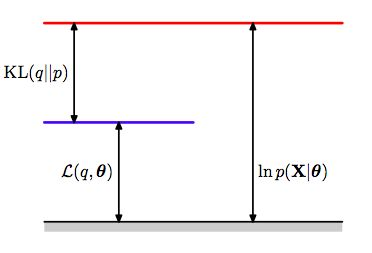

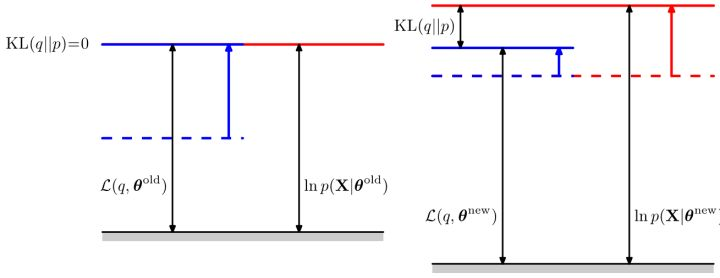

EM

* E步：$q(\mathbf{Z}) = p(\mathbf{Z} \mid \mathbf{X},\mathbf{θ}^{old})$代入，则有

$$\begin{align*}
\mathcal{L}(q,\mathbf{θ}) &= \sum_{\mathbf{Z}}q(\mathbf{Z}) \ln \left\{\frac{p(\mathbf{X,Z} \mid \mathbf{θ})}{q(\mathbf{Z})}\right\} \\
&= \sum_{\mathbf{Z}}p(\mathbf{Z} \mid \mathbf{X},\mathbf{θ}^{old}) \ln \left\{\frac{p(\mathbf{X,Z} \mid \mathbf{θ})}{p(\mathbf{Z} \mid \mathbf{X},\mathbf{θ}^{old})}\right\} \\
&= \sum_{\mathbf{Z}} p(\mathbf{Z} \mid \mathbf{X},\mathbf{θ}^{old}) \ln p(\mathbf{X,Z} \mid \mathbf{θ}) - \sum_{\mathbf{Z}} p(\mathbf{Z} \mid \mathbf{X},\mathbf{θ}^{old}) \ln p(\mathbf{Z} \mid \mathbf{X},\mathbf{θ}^{old}) \\
&= \mathcal{Q}(\mathbf{θ},\mathbf{θ}^{old}) + const
\end{align*}$$

* M步：通过初始化的$θ^{old}$求得模型，才利用梯度为0，迭代优化使得$\mathcal{Q}(\mathbf{θ},\mathbf{θ}^{old})$最大化的参数$\widehat{θ}$

In [ ]:
# 说明：
# 已知N个样本X = {x1,…,xN}，潜变量Z = {z1,…,zN}，参数θ = {π1,…,πk,μ1,…,μk,Σ1,…,Σk}
# p(Z∣X,θold)：是在已知数据X和初始值θ条件下Z的概率
# 从p(Z∣X,θold)lnp(Z∣X,θold)这个式子看出是信息熵，是一个常数
# 而从lnp(X,Z∣θ)p(Z∣X,θ^old)看出是对给定X,θ^old的函数lnp(X,Z|θ)对Z求期望，也就是E[ln(X,Z∣θ)|X,θ^old]，也就是为什么说EM算法，
# 在求最大化期望的原因了
# 离散函数的期望为E[ln(x)] = Σln(x)p(x)

In [40]:
# 说明：当q(Z)=p(Z∣X,θold)时，即KL(p∥q)=0
# ∑Zp(Z∣X,θold)lnp(Z∣X,θold)是信息熵，是一个常数
# 说明：我们优化的目标函数是lnp(X∣θ)，而lnp(X∣θ)=L(q,θ)+KL(q∥p)，故有
# lnp(X∣θ)>=L(q,θ)，我们可以令KL(p∥q)=0，那就变成优化其下界(下界最大化)，也就是优化
# Q(θ,θold)
# θ发生变化的同时，KL(p∥q)也会增加，随着L(q,θ)值得上升，lnp(X∣θ)也跟着上升
# EM的求解思路有两种：
# 1、Jensen不等式
# 2、KL散度+L似然函数
# 本质上都是一样的

EM总结：

* E步：用$\mathbf{θ}^{old}$，然后计算

$$\begin{align*}
\mathcal{Q}(\mathbf{θ},\mathbf{θ}^{old}) &= \sum_{\mathbf{Z}} \ln p(\mathbf{X,Z} \mid \mathbf{θ}) p(\mathbf{Z} \mid \mathbf{X},\mathbf{θ}^{old})  \\
&= E_{\mathbf{Z}}\left[\ln p(\mathbf{X,Z} \mid \mathbf{θ}) \mid \mathbf{X},\mathbf{θ}^{old}\right]
\end{align*}$$

* M步

$$\mathbf{θ}^{new} = \arg \max_{\mathbf{θ}}\mathcal{Q}(\mathbf{θ},\mathbf{θ}^{old})$$

In [41]:
# 说明：Q(θ,θold)实际上在对Z求期望

In [42]:
# EM算法总结：
# 1、写出似然函数，优化目标
# 2、使用最大似然直接优化只有观测值的目标函数很困难(存在ln(a+b+...+n)的对数求导困难)
# 3、利用KL散度和L似然下界的思路，通过令KL=0，去优化目标函数的下界L
# 4、该下界函数其实是一个对Z的期望
# 5、Z是潜变量的分布，需要引入潜变量，重写写出包含观测值和潜变量的似然函数
# 6、再对这个似然函数取对数
# 7、对这个对数函数求Z得期望，得到我们要优化的目标函数
# 8、该期望优化函数中包含γ(znk)，而这个值在GMM中是后验概率，可以通过初始化θ值求得，这一步是E步 因为是期望函数
# 9、将旧值代入期望函数，去迭代优化得到使得期望函数最大化的θ值，这步是M步
# 10、不断迭代，直到函数收敛

应用于GMM

* 似然函数

$$p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) = \prod_{n=1}^N\prod_{k=1}^K\pi_k^{z_{n,k}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}}$$

    对比：
    
$$p(\mathbf{X}\mid\mathbf{μ,Σ,\pi}) = \prod_{n=1}^N \ln \left\{{\sum_{k=1}^K\pi_k\mathcal{N}(\mathbf{x_n}\mid\mathbf{μ_k,Σ_k})}\right\}$$

* log似然

$$\ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) = \sum_{n=1}^N\sum_{k=1}^Kz_{n,k}\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\}$$
    
    
    对比:
    
$$\ln p(\mathbf{X}\mid\mathbf{μ,Σ,\pi}) = \sum_{n=1}^N \ln \left\{{\sum_{k=1}^K\pi_k\mathcal{N}(\mathbf{x_n}\mid\mathbf{μ_k,Σ_k})}\right\}$$

* 期望

$$E_{\mathbf{Z}}\left[\ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) \right] = \sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\}$$

In [ ]:
# 说明：
# 独立观测数据X的似然函数等效于，引入潜变量Z后的联立似然函数
# 对于公式p(X∣μ,Σ,π)=∏n=1Nln{∑k=1KπkN(xn∣μk,Σk)}中的ln的解释是对单独一个观测数据取对数，而∏n=1N则是N个独立观测数据组合成混合高斯模型
# 也是独立观测数据X时的似然函数，自然想到再次取对数，得到其对数似然，但该对数似然比较难求导
# 故而我们引入隐变量后，对数似然函数也有些变化，但却很方便求导，对数跑到Σ里面了
# 对数原始对数似然函数不方便求导的两种解释：
# 其一：是通过引入的潜变量Z，写出联合X,Z的似然函数，再取其对数，可得联立X,Z的对数似然，该对数似然，对数在Σ里面，求导变得简单(其理论是结合KL距离
# 和对应的L(q,θ)也就是期望支撑，也就是说我们需要求对数似然的期望，这个期望也就是EM算法优化的目标函数的下界函数)
# 其二：另一种方法就是利用jensen不等式

推导log似然：

$$\begin{align*}
\ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) &= \ln \prod_{n=1}^N\prod_{k=1}^K\pi_k^{z_{n,k}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}} \\
&= \ln \left\{\prod_{k=1}^K\pi_k^{z_{1,k}}\mathcal{N}(\mathbf{x}_1 \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{1,k}} \times \dots \times \prod_{k=1}^K\pi_k^{z_{n,k}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}}\right\} \\
&= \ln \prod_{k=1}^K\pi_k^{z_{1,k}}\mathcal{N}(\mathbf{x}_1 \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{1,k}} + \dots + \ln \prod_{k=1}^K\pi_k^{z_{n,k}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}} \\
&= \sum_{n=1}^N \ln \prod_{k=1}^K \pi_k^{z_{n,k}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}} \\
&= \sum_{n=1}^N \ln \left\{\pi_1^{z_{n,1}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_1,\mathbf{Σ}_1)^{z_{n,1}} \times \dots \times  \pi_K^{z_{n,K}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_K,\mathbf{Σ}_K)^{z_{n,K}}\right\} \\
&= \sum_{n=1}^N \left\{\ln \pi_1^{z_{n,1}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_1,\mathbf{Σ}_1)^{z_{n,1}} + \dots + \ln \pi_K^{z_{n,K}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_K,\mathbf{Σ}_K)^{z_{n,K}}\right\} \\
&= \sum_{n=1}^N \sum_{k=1}^K \ln \pi_K^{z_{n,k}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}} \\
&= \sum_{n=1}^N \sum_{k=1}^K \left\{\ln \pi_K^{z_{n,k}} + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}} \right\} \\
&= \sum_{n=1}^N\sum_{k=1}^Kz_{n,k}\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\}
\end{align*}$$

推导log似然期望：

$$\begin{align*}
E_{\mathbf{Z}}\left[\ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) \right] &= \sum_{\mathbf{Z}}p(\mathbf{Z} \mid \mathbf{X,μ,Σ,\pi}) \ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,\pi}) \\
&= \sum_{\mathbf{Z}}\frac{p(\mathbf{X,Z} \mid \mathbf{μ,Σ,\pi})}{p(\mathbf{X} \mid \mathbf{μ,Σ,\pi})}\ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,\pi})
\end{align*}$$

由

$$p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) = \prod_{n=1}^N\prod_{k=1}^K\pi_k^{z_{n,k}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}}$$
$$p(\mathbf{X}\mid\mathbf{μ,Σ,\pi}) = \prod_{n=1}^N\sum_{j=1}^K\pi_j\mathcal{N}(\mathbf{x}_n\mid\mathbf{μ}_j,\mathbf{Σ}_j)$$
$$\ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) = \sum_{n=1}^N\sum_{k=1}^Kz_{n,k}\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\}$$

继而有：

$$\begin{align*}
E_{\mathbf{Z}}\left[\ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) \right] &= \sum_{\mathbf{Z}}\frac{\prod_{n=1}^N\prod_{k=1}^K\pi_k^{z_{n,k}}\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)^{z_{n,k}}}{\prod_{n=1}^N\sum_{j=1}^K\pi_j\mathcal{N}(\mathbf{x}_n\mid\mathbf{μ}_j,\mathbf{Σ}_j)}\sum_{n=1}^N\sum_{k=1}^Kz_{n,k}\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\} \\
&= \frac{\pi_k\mathcal{N}(\mathbf{x} \mid \mathbf{μ}_k,\mathbf{Σ}_k)}{\sum_{j=1}^K\pi_j\mathcal{N}(\mathbf{x}\mid\mathbf{μ}_j,\mathbf{Σ}_j)}\sum_{n=1}^N\sum_{k=1}^K\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\} \\
&= γ(z_{n,k})\sum_{n=1}^N\sum_{k=1}^K\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\} \\
&= \sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\}
\end{align*}$$

求解$\mathbf{μ_k,Σ_k,\pi_k}$：

因$$\begin{align*}
\mathcal{Q}(\mathbf{θ},\mathbf{θ}^{old}) &= E_{\mathbf{Z}}\left[\ln p(\mathbf{X,Z} \mid \mathbf{μ,Σ,π}) \right] \\
&= \sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\}
\end{align*}$$

另外，我们有：

责任:

$$γ(z_{n,k}) = \frac{\pi_k\mathcal{N}(\mathbf{x}_n\mid\mathbf{μ}_k,\mathbf{Σ}_k)}{\sum_{j=1}^K\pi_j\mathcal{N}(\mathbf{x}_n\mid\mathbf{μ}_j,\mathbf{Σ}_j)}$$是一个常数，无需拆开求导

多元高斯分布：

$$\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k) = \frac{1}{\sqrt{(2\pi)^d|\mathbf{Σ}_k|}}e^{\left[-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^TΣ_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)\right]}$$

我们需要优化Q函数，继而优化$\sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\}$，求解最优$\mathbf{μ_k,Σ_k,\pi_k}$

将$\mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)$代入$\sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\}$，进行化简，得

$$\sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\ln \pi_k + \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{μ}_k,\mathbf{Σ}_k)\right\} = \sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\ln \pi_k + \left[-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)\right] - \frac{d}{2}\ln(2\pi) - \frac{1}{2}\ln|\mathbf{Σ}_k|\right\}$$

求解$\mathbf{μ_k}$，对$\mathbf{μ_k}$求偏导，得

$$\begin{align*}
\frac{\partial \mathcal{Q}(\mathbf{θ},\mathbf{θ}^{old})}{\partial \mathbf{μ}_k} &= \sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)(\mathbf{x}_n-\mathbf{μ}_k)\mathbf{Σ}_k^{-1} = 0
\end{align*}$$

说明：此处的$\mathbf{Σ}_k^{-1}$和$γ\left(z_{n,k}\right)$可以通过初始值求得，继而有：

$$\sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)(\mathbf{x}_n-\mathbf{μ}_k) = 0 $$
$$\Downarrow$$
$$\sum_{n=1}^Nγ\left(z_{n,k}\right)\mathbf{x}_n = \sum_{n=1}^Nγ\left(z_{n,k}\right)\mathbf{μ}_k$$

定义$N_k = \sum_{n=1}^Nγ(z_{n,k})$，则有：

$$\sum_{n=1}^Nγ\left(z_{n,k}\right)\mathbf{x}_n = N_k\mathbf{μ}_k$$

继而得到：

$$\widehat{\mathbf{μ}}_k = \frac{1}{N_k}\sum_{n=1}^Nγ(z_{n,k})\mathbf{x_n}$$

求解$\mathbf{Σ_k}$，对$\mathbf{Σ_k}$求偏导，

这里涉及到对逆矩阵$\mathbf{Σ_k}^{-1}$求导，

我们根据如下推导：

$$\mathbf{0} = \mathbf{I}' = [\mathbf{Σ}_k\mathbf{Σ}_k^{-1}]' = \mathbf{Σ}_{k}'\mathbf{Σ}_k^{-1} + \mathbf{Σ}_k[\mathbf{Σ}_k^{-1}]'$$
$$\Downarrow$$
$$[\mathbf{Σ}_k^{-1}]' = -\mathbf{Σ}_k^{-1}\mathbf{Σ}_k'\mathbf{Σ}_k^{-1}$$

且有行列式对矩阵的求导，根据matrix cookbook有：

$$\frac{\partial \ln |\mathbf{Σ}_k|}{\partial \mathbf{Σ}_k} = 2\mathbf{Σ}_k^{-1} - (\mathbf{Σ}_k^{-1}\cdot\mathbf{I}) = \mathbf{Σ}_k^{-1}$$
$$\mathbf{Σ}_k' = \frac{\partial \mathbf{I}\mathbf{Σ}_k}{\partial \mathbf{Σ}_k} = \mathbf{I}$$


得：

已知$\mathbf{Σ}_k$是协方差矩阵，且可逆，则有$\mathbf{Σ}_k$是正定矩阵

$$\begin{align*}
\frac{\partial \mathcal{Q}(\mathbf{θ},\mathbf{θ}^{old})}{\partial \mathbf{Σ}_k} &= \sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)(\mathbf{x}_n-\mathbf{μ}_k)^T\left(-\mathbf{Σ}_k^{-1}\mathbf{Σ}_k'\mathbf{Σ}_k^{-1}\right) - \frac{1}{2}\mathbf{Σ}_k^{-1}\right\} \\
&= \sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)(\mathbf{x}_n-\mathbf{μ}_k)^T\left(\mathbf{Σ}_k^{-1}\mathbf{Σ}_k'\mathbf{Σ}_k^{-1}\right) - \frac{1}{2}\mathbf{Σ}_k^{-1}\right\} =0 \\
\end{align*}$$
$$\Downarrow$$
$$\sum_{n=1}^Nγ\left(z_{n,k}\right)(\mathbf{x}_n-\mathbf{μ}_k)(\mathbf{x}_n-\mathbf{μ}_k)^T = \sum_{n=1}^Nγ\left(z_{n,k}\right)\mathbf{Σ}_k$$
$$\Downarrow$$
$$\sum_{n=1}^Nγ\left(z_{n,k}\right)(\mathbf{x}_n-\mathbf{μ}_k)(\mathbf{x}_n-\mathbf{μ}_k)^T = N_k\mathbf{Σ}_k$$
$$\Downarrow$$
$$\widehat{\mathbf{Σ}}_k = \frac{1}{N_k}\sum_{n=1}^Nγ(z_{n,k})(\mathbf{x_n} - \mathbf{μ}_k)(\mathbf{x_n} - \mathbf{μ}_k)^T$$

求解$\pi_k$，因有$\sum_{k=1}^K\pi_k = 1$的约束条件，需要结合拉格朗日乘子法求解，故而将目标函数转换为如下：

$$\sum_{n=1}^N\sum_{k=1}^Kγ\left(z_{n,k}\right)\left\{\ln \pi_k + \left[-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)\right] - \frac{d}{2}\ln(2\pi) - \frac{1}{2}\ln|\mathbf{Σ}_k|\right\} + λ\left(\sum_{k=1}^K\pi_k - 1\right)$$

上式对$\pi_k$求导，则有：

$$\frac{\partial \mathcal{Q}(\mathbf{θ},\mathbf{θ}^{old})}{\partial \pi_k} = \sum_{n=1}^Nγ\left(z_{n,k}\right)\frac{1}{\pi_k} + λ = 0$$

对上式两边同时乘以$\pi_k$，得：

$$N_k + λ\pi_k = 0$$

对所有$k$求和，有：

$$\sum_{k=1}^KN_k + λ\sum_{k=1}^K\pi_k = 0$$

由$\sum_{k=1}^K\pi_k = 1$，可得：

$$λ = - N$$

继而有：

$$\widehat{\pi}_k = \frac{N_k}{N}$$

说明：定义的$N_k = \sum_{n=1}^Nγ(z_{n,k})$是属于$k$个聚类的有效点的数量，可以体会下

证明GMM的目标函数不是凸函数

假定GMM的目标函数是凸函数，也就是组成期望函数的三个函数都要是凸函数，继而证明$\ln \pi_k$，$-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)$ 和 $-\frac{1}{2}\ln|\mathbf{Σ}_k|$是凸函数

先证明$\ln \pi_k$是凸函数，我们使用对$\pi_k$的二阶导Hessian矩阵半正定来证明：

设$\pi_k ≠ 0 $，且$\pi_k$是一个常数

$$\nabla_{\pi_k}(\ln \pi_k) = \frac{1}{\pi_k}$$

$$\Downarrow$$

$$\nabla_{\pi_k}^2(\ln \pi_k) = -\frac{1}{\pi_k^2} < 0$$

正得$\ln \pi_k$是非凸函数，二阶导对$\pi_k$ 有$\mathbf{z}^T\nabla_{\pi_k}^2(\ln \pi_k)\mathbf{z} < 0$，联合一阶导存在局部极大值

再来证明$-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)$是凸函数：

我们有$\mathbf{Σ}_k$是正定对称矩阵，且可逆，则有：

$$\mathbf{Σ}_k\cdot\mathbf{Σ}_k^{-1} = \mathbf{I}$$

因有$\mathbf{Σ}_k$和$\mathbf{I}$为正定矩阵，则推出$\mathbf{Σ}_k^{-1}$也为对称正定矩阵

$$\nabla_{\mathbf{μ}_k}\left[-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)\right] = \left(\mathbf{x}_n-\mathbf{μ}_k\right)\mathbf{Σ}_k^{-1}$$

$$\Downarrow$$

$$\nabla_{\mathbf{μ}_k}^2\left[-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)\right] = -\mathbf{Σ}_k^{-1} \prec \mathbf{0}$$

正得对于$\mathbf{μ}_k$，$-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)$是非凸函数

$$\nabla_{\mathbf{Σ}_k}\left[-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)\right] = \frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)(\mathbf{x}_n-\mathbf{μ}_k)^T\left(\mathbf{Σ}_k^{-1}\mathbf{Σ}_k'\mathbf{Σ}_k^{-1}\right)$$

$$\Downarrow$$

$$\nabla_{\mathbf{Σ}_k}^2\left[-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)\right] = \frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T(\mathbf{x}_n-\mathbf{μ}_k)2\left({\mathbf{Σ}_k^{-1}}\right)\left(\mathbf{Σ}_k^{-1}\mathbf{Σ}’\mathbf{Σ}_k^{-1}\right) = (\mathbf{x}_n-\mathbf{μ}_k)^T(\mathbf{x}_n-\mathbf{μ}_k)\left[{\mathbf{Σ}_k^{-1}}\right]^3 > 0$$

故而有$\mathbf{z}^T\nabla_{\mathbf{Σ}_k}^2\left[-\frac{1}{2}(\mathbf{x}_n-\mathbf{μ}_k)^T\mathbf{Σ}_k^{-1}(\mathbf{x}_n-\mathbf{μ}_k)\right]\mathbf{z} = \frac{1}{2}\left(\mathbf{z}^T(\mathbf{x}_n-\mathbf{μ}_k)\right)^2\left[{\mathbf{Σ}_k^{-1}}\right]^3 > 0$，证得对于$\mathbf{Σ}_k$是凸函数

而对于函数$-\frac{1}{2}\ln|\mathbf{Σ}_k|$，同样有$\nabla_{\mathbf{Σ}_k}^2 > 0$ 是凸函数

所以对于高斯混合模型是凸函数和非凸函数的组成，也就是有凸也有凹，且存在鞍点，所以该函数是非凸函数，一般来说存在局部最优解

In [47]:
# 最终得到局部最优解

In [44]:
# PMRL笔记

In [45]:
# 1、一个观测变量的概率密度可以通过引入潜变量，求其边缘概率得到，而边缘概率里的联合概率
# 可以通过条件概率密度来表示进一步求得
# 2、指示变量，用于被指定分配到哪个聚类，在GMM中，也就是zk这个元素属于哪个高斯分布，如果属于第k
# 个高斯分布，那zk就为1，其余的为0，以此来表示，或者说叫做指示被分配到哪个高斯
# 通俗点将，如果这个数据被分到第k个分类，那么rnk=1，那么rn(k-1)=0
# 3、k-means收敛直到聚类中心不再改变，或者设置了停止条件
# 4、k-means的目标函数并非凸函数，所以算法可能只收敛到一个局部最小值而不是全局最小值
# 5、选择合适的初始值，能够使得函数快速收敛，一般为随机数据点组成的子集
# 6、k-means根据目标函数需要计算每个样本点，大样本时，速度显然会比较慢，加速k-means的方法也有很多
# 比如：相邻的数据点应属于同一个子树。还有使用距离的三角不等式，可以避免不必要的计算
# 7、同样我们也可以使用类似梯度下降法，迭代求μk
# 8、图像压缩使用k-means方法，每个像素存储的是属于哪个k分类，和k个聚类中心μk的亮度值
# 也就是说只要存储属于哪个分类，以及这个分类的亮度值，共24K+Nlog2K bit
# 9、高斯混合模型里的观测数据[x1,x2,...,xn]，每一个观测数据，对应一个潜变量z，即有[z1,z2,...,zn]个潜变量
# 与之对应
# 10、高斯混合模型中的γ(zk)的理解，πk可以看做是zk=1的先验概率，而γ(zk)看成是看到观测数据x之后，对应的后验概率
# 也可以理解为分量k对于“解释”观测值x得“责任”，或者说是共享度
# 11、当混合高斯模型中的其中一个高斯分布退化为只有一个数据点时，这个数据点即为它自己的均值μ1，而σ1则趋于0，
# 而另一个高斯分布则正常，这种情况的高斯混合使用最大似然估计进行聚类会有过拟合的现象
# 12、出现上述这种情况，我们可以采用贝叶斯方法，或者仍然使用最大似然，但当我们检测到高斯分量收缩到一个点时，
# 将其均值重新设定一个随机选择值，方差重新定义一个较大的值，再继续优化
# 13、高斯混合模型中的γ(zk)表示的后验概率，这个数据点属于哪个聚类的可能性大小，当同时属于多个聚类的可能性都很大时
# 在绘制图形时，可以使用不同的颜色标记
# 14、因高斯混合模型使用EM算法如果初始值没选好，可能会经过更多的迭代，计算量也更大，通常，我们先使用k-means算法找到
# 混合高斯模型的一个合适的初始值，然后再使用EM算法进行优化
# k-means每次只是需要找质心，而高斯混合模型每次都需要重新生成新的高斯分布，自然会慢很多
# 通过k-means找到初始化质心，然后再根据这个质心找到样本的协方差，而混合系数为类别样本占比
# 15、目标函数为对数似然函数，会存在多个局部极大值

从K-means目标函数求得的$μ_k = \frac{\sum_nr_{nk}x_n}{\sum_nr_{nk}}$可以看出，其表示的是类别$k$的所有数据点的均值
$\sigma_1$

In [46]:
# 解析解：是一个固定的值
# 闭合解：是一个区间

In [1]:
# EM算法有点类似两个人在赛跑，一个人在前，一个在后，后面的人不断在赶前面的人
# 后面的人赶上一段，前面的人也跑了一段，之间总是有这么一个差距，而E步就相当于
# 前面的人不跑了在等后面的人赶上，再跑，速度比后面的人快，很快就又拉开了距离，
# 这样不断重复，直到前面的人先到达终点，后面的人最后也到达终点，算法收敛